<a href="https://colab.research.google.com/github/iampramodyadav/ML/blob/main/K_Fold_Simple_Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Fold Cross Validation

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#K-Fold-Cross-Validation" data-toc-modified-id="K-Fold-Cross-Validation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>K-Fold Cross Validation</a></span><ul class="toc-item"><li><span><a href="#Loading-libraries" data-toc-modified-id="Loading-libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Loading libraries</a></span></li><li><span><a href="#Procedure" data-toc-modified-id="Procedure-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Procedure</a></span></li></ul></li><li><span><a href="#Data-set-1" data-toc-modified-id="Data-set-1-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data set-1</a></span><ul class="toc-item"><li><span><a href="#data-preprocessing" data-toc-modified-id="data-preprocessing-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>data preprocessing</a></span></li><li><span><a href="#Simple-Cross-Validation" data-toc-modified-id="Simple-Cross-Validation-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Simple Cross Validation</a></span></li><li><span><a href="#Ten-fold-cross-validation" data-toc-modified-id="Ten-fold-cross-validation-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Ten fold cross validation</a></span><ul class="toc-item"><li><span><a href="#KNN-with-Optimal-k" data-toc-modified-id="KNN-with-Optimal-k-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>KNN with Optimal k</a></span></li></ul></li></ul></li><li><span><a href="#Data-Set-2" data-toc-modified-id="Data-Set-2-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Set-2</a></span></li></ul></div>

## Loading libraries

In [ ]:
# ============================== loading libraries ===========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score

from collections import Counter
from sklearn.metrics import accuracy_score

#from sklearn import cross_validation
from sklearn.model_selection import cross_validate
# =============================================================================================

## Procedure

1. Import the libraries and read the data into a dataframe.
2. Perform Exploratory Data Analysis and summarize the characteristics of the dataset.
3. Perform Text preprocessing and remove the punctuations, stopwords andconvert all the words to lowercase.
4. If you want to go for Simple Cross Validation, Split the dataset into 3 parts. D_train,D_cv,D_test and convert the text into features on D_train and using the same feature, convert the text into D_cv and D_test into columns.**Perform hyper-parameter tuning through Simple Cross validation and find out the optimal value of 'K' and build an optimal model now with the optimal value of 'K'. Make predictions on the test data and then compute the performance metrics.**
4.  If you want to go for K'-fold Cross Validation, Split the dataset into 2 parts. D_train and D_test and convert the text into features on D_train and using the same feature, convert the text into D_test into columns.**Perform hyper-parameter tuning through K'-fold Cross validation and find out the optimal value of 'K' and build an optimal model now with the optimal value of 'K'. Make predictions on the test data and then compute the performance metrics.**

If you are using **simple cross validation** technique, then you need to divide the dataset into train, cv and test sets. You have to
1. train the model on train data
2. perform cross validation and find the optimal hyper-parameters using cv data
3. Retrain the model now using (train+cv) data using the optimal hyper-parameters. 
3. make predictions on the test data and compute the performance metrics.

If you are using **k-fold cross validation**, 
1. divide the dataset into train and test datasets.
2. The train data gets divided into k folds and k cross validations will happen with one of the fold as CV data and the remaining folds as train data.
3. The average of the CV scores is computed and through that you have to find the optimal hyper-parameter.
4. Train the model again with the optimal hyper-parameter using train data and make predictions on the test data and compute the performance metrics.

# Data set-1


## data preprocessing

In [ ]:
# Part I
# ============================== data preprocessing ===========================================

# define column names
names = ['x', 'y', 'class']

# loading training data
df = pd.read_csv('./demo_data/3.concertriccir2.csv', header=None, names=names)
print(df.head())

# create design matrix X and target vector y
X = np.array(df.iloc[:, 0:2]) # end index is exclusive
y = np.array(df['class']) # showing you two ways of indexing a pandas df


          x         y  class
0  0.700335 -0.247068    0.0
1 -3.950019  2.740080    1.0
2  0.150222 -2.157638    1.0
3 -1.672050 -0.941519    1.0
4  2.560483 -1.846577    1.0


## Simple Cross Validation 

In [ ]:
# split the data set into train and test
X_1, X_test, y_1, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = train_test_split(X_1, y_1, test_size=0.3)

for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i)

    # fitting the model on crossvalidation train
    knn.fit(X_tr, y_tr)

    # predict the response on the crossvalidation train
    pred = knn.predict(X_cv)

    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))
    
knn = KNeighborsClassifier(1)
knn.fit(X_tr,y_tr)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 1 is %d%%' % (acc))


CV accuracy for k = 1 is 84%

CV accuracy for k = 3 is 89%

CV accuracy for k = 5 is 84%

CV accuracy for k = 7 is 83%

CV accuracy for k = 9 is 83%

CV accuracy for k = 11 is 83%

CV accuracy for k = 13 is 81%

CV accuracy for k = 15 is 83%

CV accuracy for k = 17 is 80%

CV accuracy for k = 19 is 80%

CV accuracy for k = 21 is 78%

CV accuracy for k = 23 is 74%

CV accuracy for k = 25 is 69%

CV accuracy for k = 27 is 68%

CV accuracy for k = 29 is 65%

****Test accuracy for k = 1 is 91%


## Ten fold cross validation 


The optimal number of neighbors is 1.


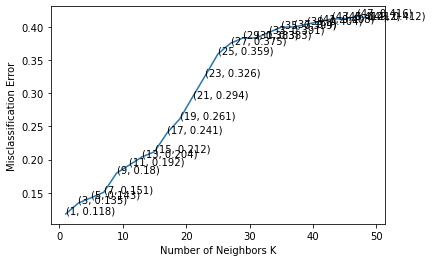

the misclassification error for each k value is :  [0.118 0.135 0.143 0.151 0.18  0.192 0.204 0.212 0.241 0.261 0.294 0.326
 0.359 0.375 0.383 0.383 0.391 0.399 0.4   0.404 0.408 0.412 0.412 0.416
 0.412]


In [ ]:

# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_tr, y_tr, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error(1-accuracy)
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
#    or
#optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

### KNN with Optimal k

In [ ]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(X_tr, y_tr)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 1 is 91.333333%


---

# Data Set-2

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import datasets, linear_model
from sklearn.neighbors import KNeighborsClassifier

diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]


# creating odd list of K for KNN
myList = list(range(0,10))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    print(k)
    knn = KNeighborsClassifier(n_neighbors=k)
    
    scores = cross_val_score(knn, X, y, cv=2, scoring='accuracy')
    #print(X)
    cv_scores.append(scores.mean())
    print(cv_scores)
    
optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

1
[0.013333333333333334]
3
[0.013333333333333334, 0.02]
5
[0.013333333333333334, 0.02, 0.013333333333333334]
7
[0.013333333333333334, 0.02, 0.013333333333333334, 0.013333333333333334]
9
[0.013333333333333334, 0.02, 0.013333333333333334, 0.013333333333333334, 0.013333333333333334]

The optimal number of neighbors is 3.


C:\Users\PRAMOD\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\PRAMOD\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\PRAMOD\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\PRAMOD\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\PRAMOD\anaconda3\lib\site-packa

In [ ]:
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
X1 = diabetes.data[150:200]
y1 = diabetes.target[150:200]
# fitting the model
knn_optimal.fit(X, y)

# predict the response
pred = knn_optimal.predict(X1)

# evaluate accuracy
acc = accuracy_score(y1, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 3 is 2.000000%




---

